In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 4

import sys;import os;
module_path = os.path.abspath(os.path.join('..')).split('PythonCode')[0]+'PythonCode'
if module_path not in sys.path: sys.path.append(module_path+"/")
    
import Plib.Stats.Regression as r
import Plib.ML.Models as ml
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification
Xr, yr = make_regression(n_samples=1500, n_features=10, n_informative=2,noise=0.2)
#Xc, yc = make_classification(n_samples=1500,n_features=5, n_redundant=0, n_informative=2,
#                             n_clusters_per_class=1)
#Xc, yc = make_classification(n_samples=1500, n_features=5, n_informative=5, n_redundant=0)
Xc, yc = make_classification(n_samples=1500, n_features=10, n_informative=8, n_redundant=2, random_state=7, n_classes=5)
	
cols=['a','b','c','d','e','a2','b2','c2','d2','e2']
df1=pd.DataFrame(Xr,columns=cols)
df1['y']=yr
df2=pd.DataFrame(Xc,columns=cols)
df2['y']=yc
df3=df2.copy()
df3['y2']=-1*df3['y']
features=cols
rg1='y'
m=ml.mlProfiler()

In [3]:
df2.head(2)

a         b         c         d         e        a2        b2  \
0  0.647804  0.486725 -0.151567 -1.864969 -0.278715 -0.498278 -0.153665   
1  1.500626 -1.946252 -1.689916  1.941802 -0.905322 -2.066403 -1.851730   

         c2        d2        e2  y  
0 -0.273961  1.596181  0.557306  0  
1 -1.628045 -1.900618 -3.743446  3

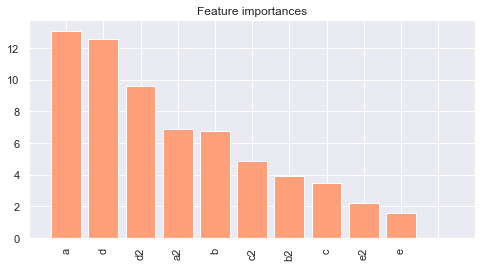

In [4]:
ret=m.fs_anova(df2,features,rg1,test_periods=25,tsplit=0.8,plot=True)



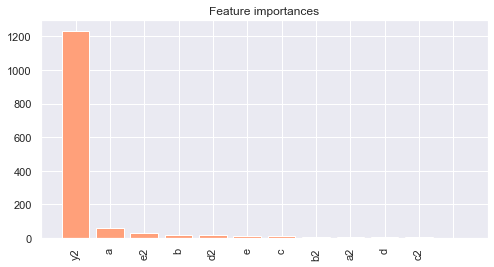

imp
y2  1233.451004
a     61.189405
e2    31.298502
b     19.021974
d2    15.807289
e     13.156517
c      8.562706
b2     6.493041
a2     4.875042
d      4.710303
c2     3.353431

In [5]:
dfp=abs(df3)
m.fs_chi2(dfp,features+['y2'],['y2'],rg1,
          test_periods=252,plot=True)

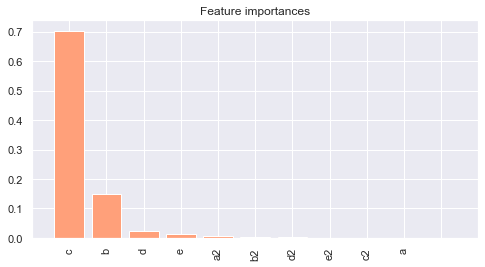

imp
c   0.702754
b   0.148895
d   0.024853
e   0.013979
a2  0.007358
b2  0.004261
d2  0.002635
e2  0.000000
c2  0.000000
a   0.000000

In [6]:
m.fs_minform(df1,features,rg1,test_periods=252,
             plot=True,imodel='r')

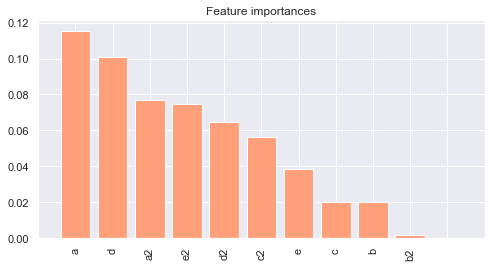

imp
a   0.115426
d   0.100665
a2  0.076816
e2  0.074406
d2  0.064520
c2  0.056492
e   0.038628
c   0.020253
b   0.020125
b2  0.001847

In [7]:
m.fs_minform(df2,features,rg1,test_periods=252,
             plot=True,imodel='c')

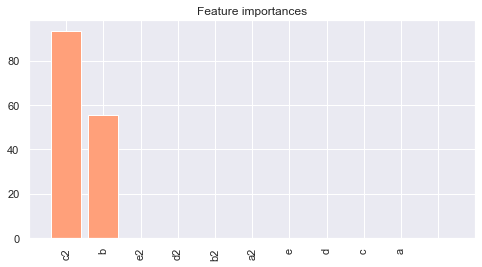

In [8]:
ret=m.fs_lasso(df1,features,rg1,
         test_periods=252,split=0.85,plot=True,imodel='r')

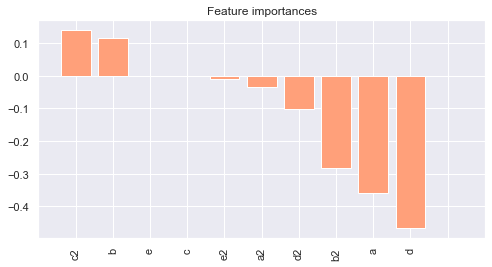

In [9]:
ret=m.fs_lasso(df2,features,rg1,
         test_periods=252,split=0.85,plot=True,imodel='c')

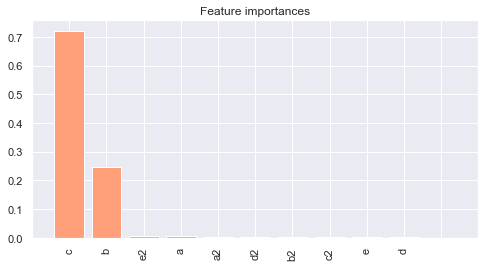

In [10]:
ret=m.fs_randF(df1,features,rg1,test_periods=252,
         threshold=0.8,test_size=0.8,plot=True,imodel='r')

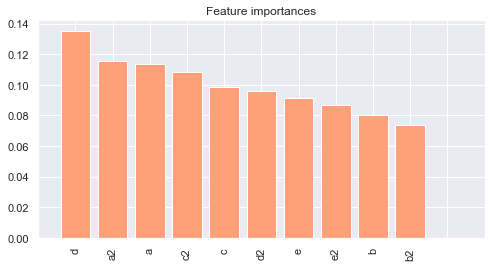

Not enough classes found...


In [11]:
ret=m.fs_randF(df3,features,rg1,test_periods=252,
         threshold=0.2,test_size=0.8,plot=True,imodel='c')

Selecting features with genetic algorithm.
gen	nevals	avg                    	std                    	min                    	max                    
0  	50    	[0.31973899 3.14      ]	[0.07115432 1.44235918]	[0.12086246 1.        ]	[0.44249617 5.        ]
1  	32    	[-1799.68940476     4.54      ]	[3.84202006e+03 1.13507709e+00]	[-1.e+04  2.e+00]      	[0.44749739 7.        ]
2  	29    	[-999.64575253    4.4       ]  	[3.00011808e+03 1.03923048e+00]	[-1.e+04  2.e+00]      	[0.44749739 6.        ]
3  	29    	[-999.62995247    4.72      ]  	[3.00012335e+03 8.00999376e-01]	[-1.e+04  3.e+00]      	[0.46125731 7.        ]
4  	28    	[-999.62403292    4.7       ]  	[3.00012532e+03 7.00000000e-01]	[-1.e+04  3.e+00]      	[0.46423814 6.        ]
5  	29    	[-1199.6311331     4.9      ]  	[3.24975158e+03 9.21954446e-01]	[-1.e+04  2.e+00]      	[0.46423814 7.        ]
6  	28    	[-999.6144041    4.94     ]    	[3.00012853e+03 5.80000000e-01]	[-1.e+04  4.e+00]      	[0.46494937 7.        ]
7  	2

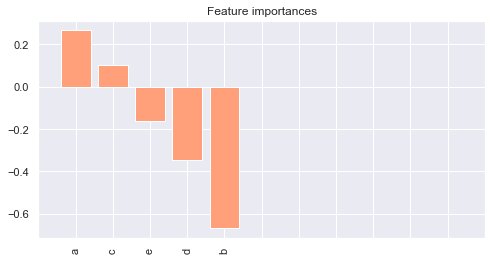

In [12]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(C=10, max_iter=1000)
scoring='f1_macro'

ret=m.fs_ga(df2,features,rg1,model,scoring)

Model  1 Mean: 0.3536 Std: 0.0178
Model  2 Mean: 0.448 Std: 0.0168
Model  3 Mean: 0.4448 Std: 0.031
Model  4 Mean: 0.4768 Std: 0.037


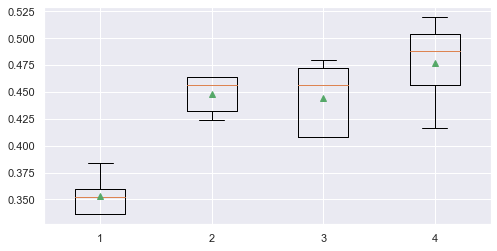

Model  4
Mean Accuracy: 0.499
Config: {'shrinkage': 0.11}


In [13]:
m.fs_lda(df2,features,rg1)